In [8]:
import sys
sys.path.append('../src')

from eda_utils import *

In [9]:
# Load data
df = load_data('../data/raw/data.csv')

In [5]:
# Quick overview
overview(df)

Dataset shape: (95662, 16)

Column types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_281

In [6]:
# Summary stats
summary_statistics(df)

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
# Numerical and categorical columns
numerical_cols = ['Amount', 'Value']
categorical_cols = ['ChannelId', 'ProductCategory', 'PricingStrategy']

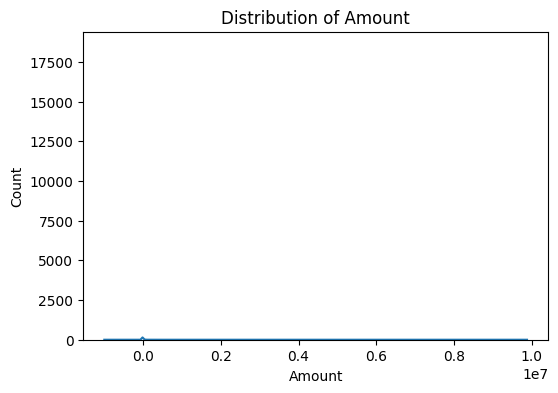

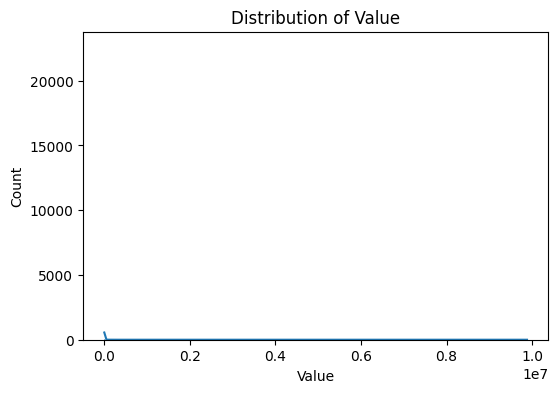

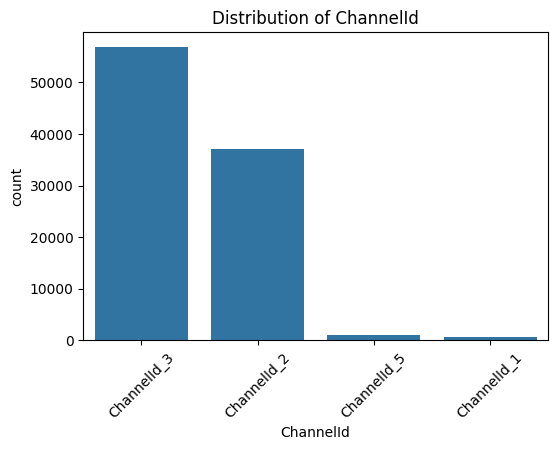

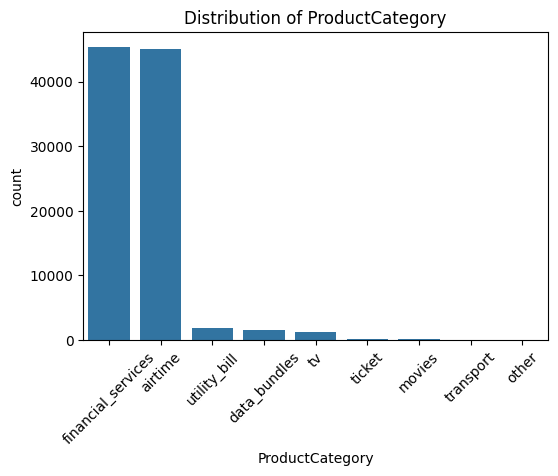

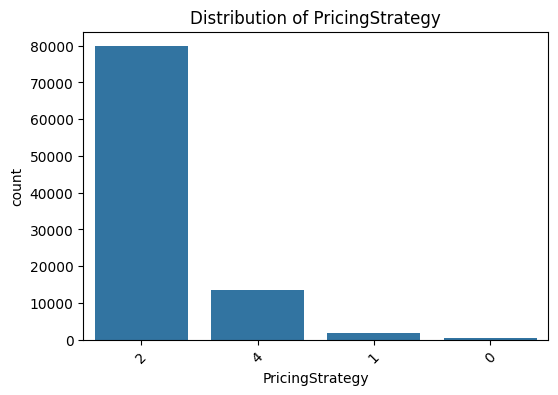

In [8]:
# Plotting
plot_numerical_distributions(df, numerical_cols)
plot_categorical_distributions(df, categorical_cols)

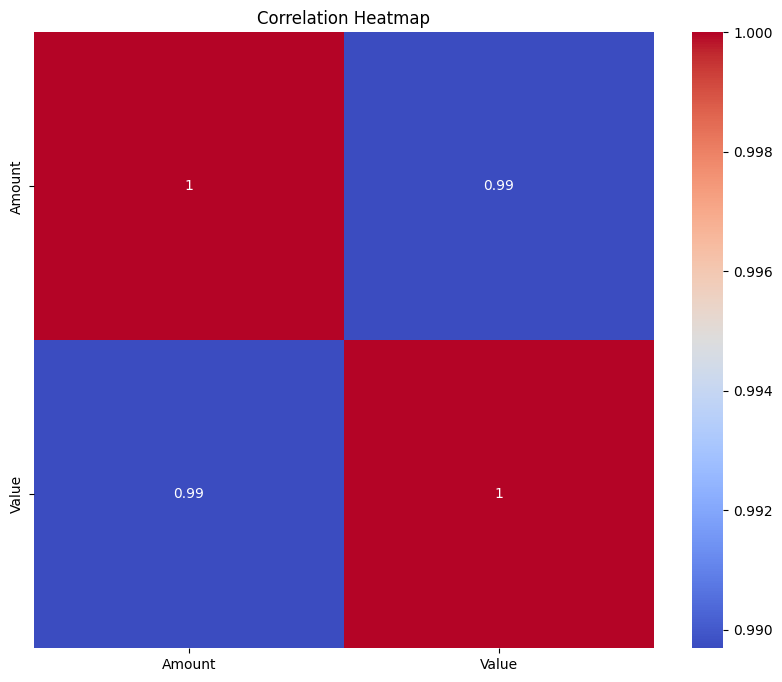

In [9]:
# Correlation
correlation_heatmap(df, numerical_cols)

In [10]:
# Missing values
print(missing_values_report(df))

Series([], dtype: int64)


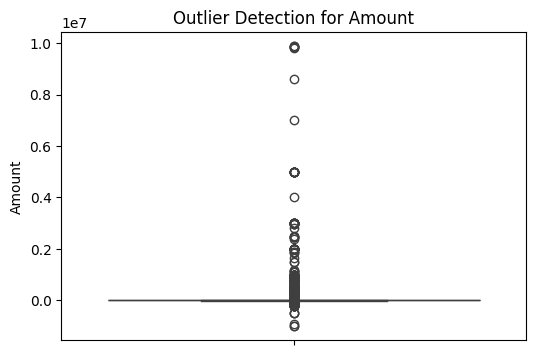

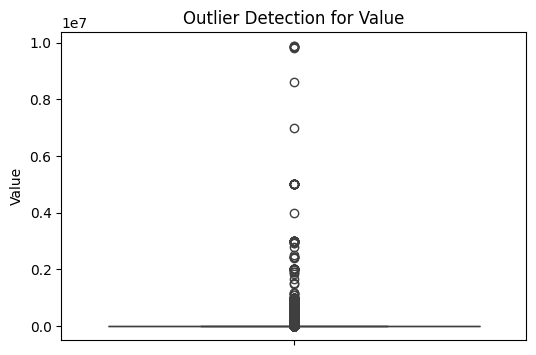

In [11]:
# Outlier check
for col in numerical_cols:
    detect_outliers(df, col)

In [4]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [14]:
from data_processing import extract_datetime_features, create_aggregate_features, get_preprocessor

In [10]:
# Extract datetime features
df = extract_datetime_features(df)

In [11]:
# Aggregate per customer
agg_df = create_aggregate_features(df)

In [16]:
# Select features for modeling
numerical_cols = ['amount_sum', 'amount_mean', 'amount_std', 'transaction_count', 'value_sum', 'value_mean']
categorical_cols = ['ChannelId', 'ProductCategory', 'PricingStrategy']

In [17]:
# Merge categorical features for each CustomerId
cat_features = df.groupby('CustomerId').agg({
    'ChannelId': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'ProductCategory': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'PricingStrategy': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()

final_df = pd.merge(agg_df, cat_features, on='CustomerId')

In [18]:
# Prepare preprocessing pipeline
preprocessor = get_preprocessor(numerical_cols, categorical_cols)

In [19]:
# Fit-transform the data
X_processed = preprocessor.fit_transform(final_df[numerical_cols + categorical_cols])